Optimal Total Value: 750.0 

Total Weight of Selected Items: 100 

Selected Items: [1, 5, 8] 



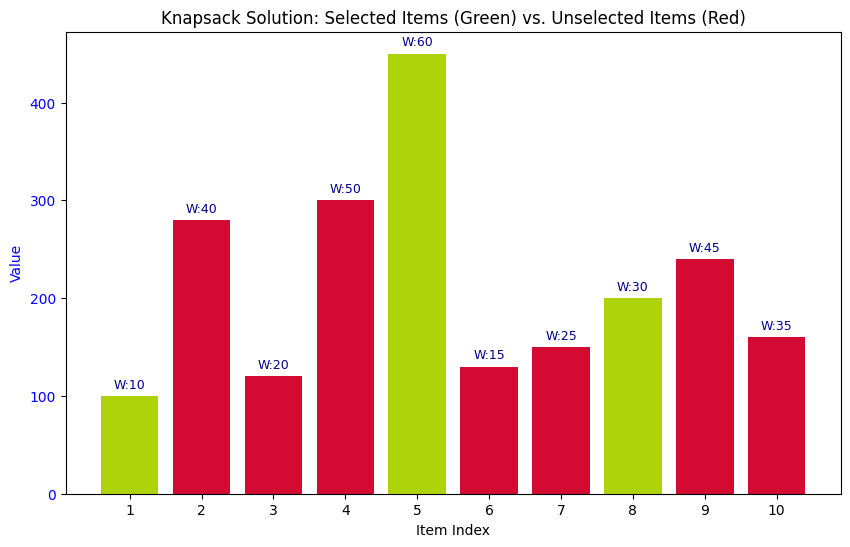

In [9]:
# !pip install pyomo
# !apt-get install -y -qq glpk-utils
import matplotlib.pyplot as plt
from pyomo.environ import *

def solve_0_1knapsack_with_pyomo(values, weights, max_weight, show_plot=True):
    """
    Solve the 0/1 Knapsack Problem using Pyomo and plot the results.

    Parameters:
    - values (list of floats): List of item values.
    - weights (list of floats): List of item weights.
    - max_weight (float): Maximum weight capacity of the knapsack.
    - show_plot (bool): If True, displays a plot of selected and unselected items.
    """

    # Initialize the model
    model = ConcreteModel()

    # Index starting from 1 for each item
    n = len(values)
    model.item_set = RangeSet(1, n)

    # Parameters for values and weights
    model.item_values = Param(model.item_set, initialize={i+1: values[i] for i in range(n)})
    model.item_weights = Param(model.item_set, initialize={i+1: weights[i] for i in range(n)})

    # Decision variables x_i for each item
    model.x = Var(model.item_set, domain=Binary)

    # Objective function: Maximize the total value
    model.obj = Objective(expr=sum(model.item_values[i] * model.x[i] for i in model.item_set), sense=maximize)

    # Constraint: The total weight of selected items should not exceed max_weight
    model.weight_constraint = Constraint(expr=sum(model.item_weights[i] * model.x[i] for i in model.item_set) <= max_weight)

    # Solve the model using the GLPK solver (ensure GLPK is installed)
    result = SolverFactory('glpk').solve(model)

    # Retrieve and print the solution
    if result.solver.status == SolverStatus.ok and result.solver.termination_condition == TerminationCondition.optimal:
        selected_items = [i for i in model.item_set if value(model.x[i]) == 1]
        total_value = value(model.obj)
        total_weight = sum(weights[i - 1] for i in selected_items)

        print("Optimal Total Value:", total_value, "\n")
        print("Total Weight of Selected Items:", total_weight, "\n")
        print("Selected Items:", selected_items, "\n")

        if show_plot:
            plot_knapsack_solution(values, weights, selected_items)
    else:
        print("No optimal solution found.")

def plot_knapsack_solution(values, weights, selected_items):
    """
    Plots the selected and unselected items in the knapsack problem.

    Parameters:
    - values (list of floats): List of item values.
    - weights (list of floats): List of item weights.
    - selected_items (list of int): Indices of selected items.
    """
    n = len(values)
    item_indices = list(range(1, n + 1))

    # Define colors for selected vs. unselected items
    colors = ['#afd30b' if i in selected_items else '#d30b32' for i in item_indices]

    # Create the bar plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for values
    ax1.bar(item_indices, values, color=colors)
    ax1.set_xlabel("Item Index")
    ax1.set_ylabel("Value", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Display item weights on top of each bar
    for i in item_indices:
        ax1.text(i, values[i-1] + 5, f"W:{weights[i-1]}", ha='center', va='bottom', color='darkblue', fontsize=9)

    # Show which items were selected vs. not selected
    plt.title("Knapsack Solution: Selected Items (Green) vs. Unselected Items (Red)")
    plt.xticks(item_indices)  # Show all indices on the x-axis

    plt.show()

# Example usage
if __name__ == "__main__":
    values = [100, 280, 120, 300, 450, 130, 150, 200, 240, 160]
    weights = [10, 40, 20, 50, 60, 15, 25, 30, 45, 35]
    max_weight = 100

    solve_0_1knapsack_with_pyomo(values, weights, max_weight, show_plot=True)